In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline 
sns.set(color_codes=True)

In [87]:
def inter_quartile_range(dataframe,feature):
    dataframe = dataframe.copy()
    Q1 = dataframe[feature].quantile(0.25)
    Q3 = dataframe[feature].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (dataframe[feature] >= Q1 - 1.5 * IQR) & (dataframe[feature] <= Q3 + 1.5 *IQR)
    return dataframe.loc[filter]


### Loading the datasets into the notebook.

In [88]:
df_train = pd.read_csv('train_wine.csv')
df_test = pd.read_csv('test_wine.csv')
df_ss = pd.read_csv('sample_submission.csv')

df_test = pd.merge(df_test, df_ss, on='id')
df = df_train.copy()

In [89]:
df_train.head()

,id,class,color,vineyard,fixed.acidity,acid.sulfur,volatile.acidity,sulfur.taste,citric.acid,residual.sugar,...,chlor.class,free.sulfur.dioxide,condition,total.sulfur.dioxide,density,pH,acid.taste,sulphates,acidity.variance,alcohol
0,1,medium,red,E,9.5,3.559427,0.59,2.411605,0.44,2.3,...,e2,21.0,I1,68.0,0.99920,3.46,2.67,0.63,0.24,9.5
1,2,good,red,C,6.4,3.131123,0.57,1.752449,0.12,2.3,...,g1,25.0,I1,36.0,0.99519,3.47,2.09,0.71,0.24,11.3
2,3,good,white,C,6.3,2.893981,0.23,2.299379,0.33,6.9,...,e3,23.0,I2,118.0,0.99380,3.23,2.34,0.46,0.24,10.4
3,4,good,red,D,7.2,2.311189,0.37,2.293916,0.32,2.0,...,i2,15.0,S1,28.0,0.99470,3.23,1.67,0.73,0.24,11.3
4,5,medium,white,E,5.9,3.185586,0.44,3.215821,0.33,1.2,...,d2,12.0,I1,117.0,0.99134,3.46,2.51,0.44,0.24,11.5


In [90]:
df_test.head()

,id,color,vineyard,fixed.acidity,acid.sulfur,volatile.acidity,sulfur.taste,citric.acid,residual.sugar,chlorides,...,free.sulfur.dioxide,condition,total.sulfur.dioxide,density,pH,acid.taste,sulphates,acidity.variance,alcohol,class
0,4356,white,D,6.9,3.067206,0.22,4.801635,0.49,7.0,0.063,...,50.0,I2,168.0,0.99570,3.54,2.16,0.50,0.24,10.3,good
1,4357,white,E,7.2,3.636035,0.27,3.346669,0.42,1.6,0.050,...,35.0,I1,135.0,0.99200,2.94,2.91,0.46,0.24,11.0,good
2,4358,white,D,7.6,3.304237,0.27,3.254801,0.30,9.2,0.018,...,23.0,I1,96.0,0.99380,3.08,2.18,0.29,0.24,11.0,good
3,4359,white,D,7.2,3.755322,0.34,1.649586,0.30,8.4,0.051,...,40.0,I1,167.0,0.99756,3.48,2.29,0.62,0.24,9.7,medium
4,4360,red,E,7.1,2.800327,0.34,2.010788,0.28,2.0,0.082,...,31.0,I1,68.0,0.99694,3.45,2.20,0.48,0.24,9.4,medium


In [91]:
df_train.dtypes

id                        int64
class                    object
color                    object
vineyard                 object
fixed.acidity           float64
acid.sulfur             float64
volatile.acidity        float64
sulfur.taste            float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
chlor.class              object
free.sulfur.dioxide     float64
condition                object
total.sulfur.dioxide    float64
density                 float64
pH                      float64
acid.taste              float64
sulphates               float64
acidity.variance        float64
alcohol                 float64
dtype: object

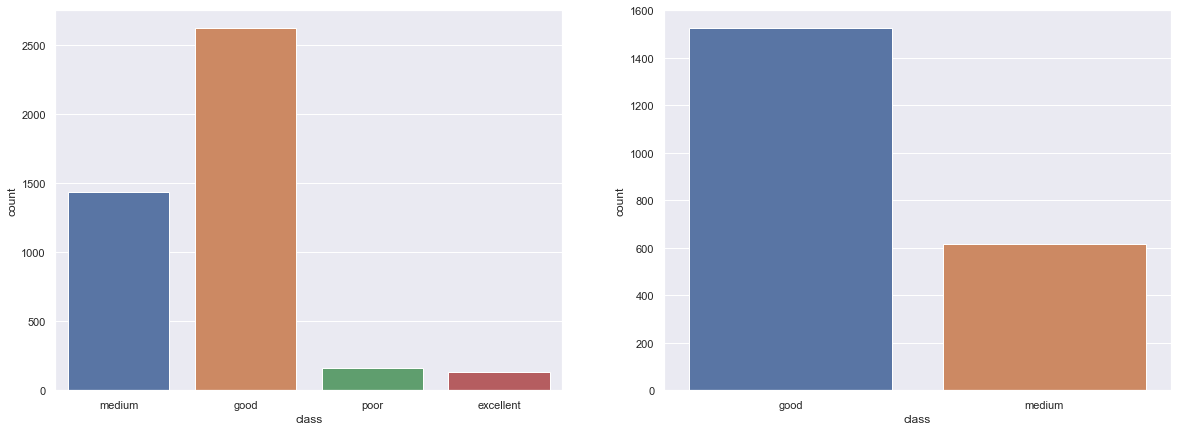

In [92]:
f, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.countplot(x = 'class',data = df_train, ax=axes[0])
sns.countplot(x = 'class',data = df_ss, ax=axes[1])

In [93]:
# df_train = df_train[(df_train['class'] != 'poor') & (df_train['class'] != 'excellent')]

# f, axes = plt.subplots(1, 2, figsize=(20, 7))
# sns.countplot(x = 'class',data = df_train, ax=axes[0])
# sns.countplot(x = 'class',data = df_ss, ax=axes[1])

In [94]:
df['class'].unique()

array(['medium', 'good', 'poor', 'excellent'], dtype=object)

From the above count plots we can see that we have a **imbalanced dataset**. In the later part of this notebook we will oversample our dataset to have the same number of samples for each class.

### Encoding feature classes which type is an object.
In order to train the model it is obligatory to convert strings and other types of objects into the integers.

In [95]:
from sklearn import preprocessing
df = df_train.copy()

labelencoders = {}
for o in df_train.select_dtypes('object').columns:
    labelencoders[o] = preprocessing.LabelEncoder()
    labelencoders[o].fit(df[o].unique())
    print('------------ '+o+' ------------')
    print(df[o].unique())
    print(labelencoders[o].transform(df[o].unique()))
    df[o] = labelencoders[o].transform(df_train[o].values)
    df_test[o] = labelencoders[o].transform(df_test[o].values)


------------ class ------------
['medium' 'good' 'poor' 'excellent']
[2 1 3 0]
------------ color ------------
['red' 'white']
[0 1]
------------ vineyard ------------
['E' 'C' 'D' 'A' 'B']
[4 2 3 0 1]
------------ chlor.class ------------
['e2' 'g1' 'e3' 'i2' 'd2' 'i1' 'd1' 'h1' 'f3' 'b2' 'i3' 'f1' 'c2' 'g3'
 'b1' 'e1' 'g2' 'f2' 'c1' 'b3' 'h3' 'h2' 'd3' 'c3']
[10 15 11 22  7 21  6 18 14  1 23 12  4 17  0  9 16 13  3  2 20 19  8  5]
------------ condition ------------
['I1' 'I2' 'S1' 'S2' 'S3' 'P1' 'P2' 'E']
[1 2 5 6 7 3 4 0]


In [96]:
df.head()

,id,class,color,vineyard,fixed.acidity,acid.sulfur,volatile.acidity,sulfur.taste,citric.acid,residual.sugar,...,chlor.class,free.sulfur.dioxide,condition,total.sulfur.dioxide,density,pH,acid.taste,sulphates,acidity.variance,alcohol
0,1,2,0,4,9.5,3.559427,0.59,2.411605,0.44,2.3,...,10,21.0,1,68.0,0.99920,3.46,2.67,0.63,0.24,9.5
1,2,1,0,2,6.4,3.131123,0.57,1.752449,0.12,2.3,...,15,25.0,1,36.0,0.99519,3.47,2.09,0.71,0.24,11.3
2,3,1,1,2,6.3,2.893981,0.23,2.299379,0.33,6.9,...,11,23.0,2,118.0,0.99380,3.23,2.34,0.46,0.24,10.4
3,4,1,0,3,7.2,2.311189,0.37,2.293916,0.32,2.0,...,22,15.0,5,28.0,0.99470,3.23,1.67,0.73,0.24,11.3
4,5,2,1,4,5.9,3.185586,0.44,3.215821,0.33,1.2,...,7,12.0,1,117.0,0.99134,3.46,2.51,0.44,0.24,11.5


### Correlation matrix - Selecting the right features for training.
Displaying correlation matrix for each feature and checking which ones has the biggest influence on the wine class.

alcohol                -0.379473
color                  -0.101465
free.sulfur.dioxide    -0.078976
citric.acid            -0.072700
sulfur.taste           -0.036649
pH                     -0.033551
sulphates              -0.028867
acidity.variance       -0.027221
id                     -0.016626
chlor.class            -0.013276
condition               0.008383
vineyard                0.018006
residual.sugar          0.021089
acid.sulfur             0.023454
total.sulfur.dioxide    0.024315
acid.taste              0.034170
fixed.acidity           0.075804
chlorides               0.176626
density                 0.254921
volatile.acidity        0.262451
class                   1.000000
Name: class, dtype: float64


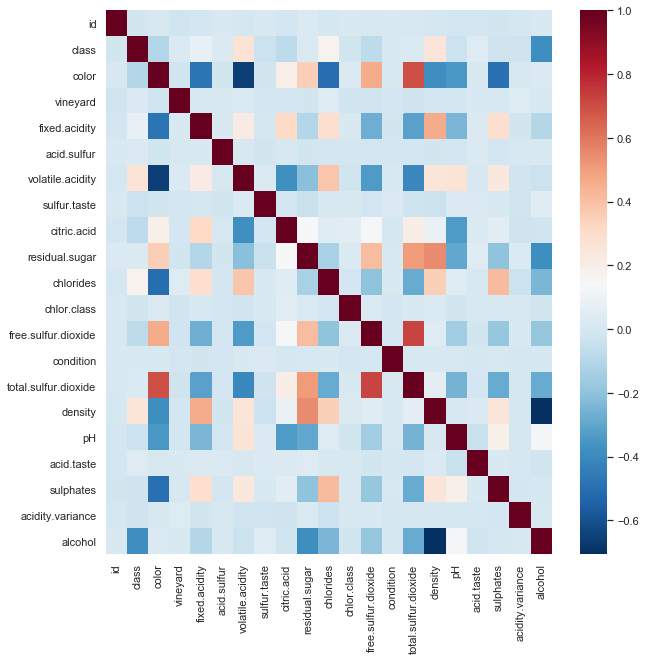

In [97]:
plt.figure(figsize=(10,10))
c= df.corr()
sns.heatmap(c, cmap="RdBu_r")
cor_matrix_sorted = c['class'].sort_values()
print(cor_matrix_sorted)

Choosing the most correlated features with the target (quality of the wine) is significant in order to achieve well generalized model.

In [98]:
# labels of interes 
loi = cor_matrix_sorted[:4].index.tolist() + cor_matrix_sorted[-4:-1].index.tolist() + ['class']
print(loi)

['alcohol', 'color', 'free.sulfur.dioxide', 'citric.acid', 'chlorides', 'density', 'volatile.acidity', 'class']


In [99]:
df[loi].head()

,alcohol,color,free.sulfur.dioxide,citric.acid,chlorides,density,volatile.acidity,class
0,9.5,0,21.0,0.44,0.071,0.99920,0.59,2
1,11.3,0,25.0,0.12,0.120,0.99519,0.57,1
2,10.4,1,23.0,0.33,0.052,0.99380,0.23,1
3,11.3,0,15.0,0.32,0.062,0.99470,0.37,1
4,11.5,1,12.0,0.33,0.049,0.99134,0.44,2


### Data visualization and preprocessing

In this training dataset there is more red wines than white wines for each class .

class      color
excellent  white     119
           red        14
good       white    2054
           red       570
medium     white     985
           red       448
poor       white     123
           red        42
Name: color, dtype: int64


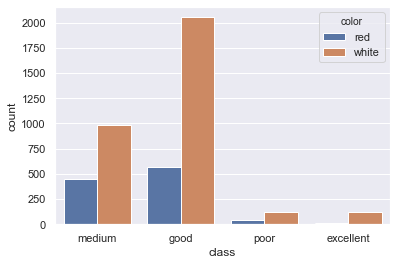

In [100]:
print((df_train.groupby('class')['color'].value_counts()))
sns.countplot(x="class", hue="color", data=df_train)

### Citric acid histogram
We can clearly see, that there are some outliers above value 0.8

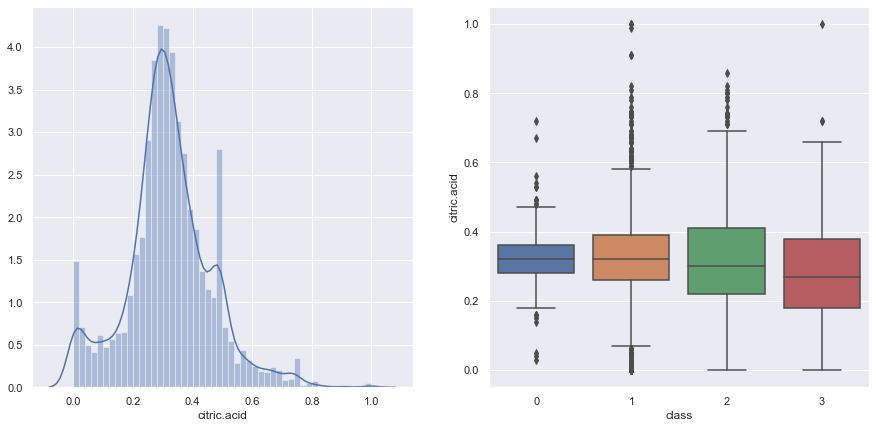

In [101]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df['citric.acid'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'citric.acid', data=df, ax=axes[1])


### Alcohol distribution

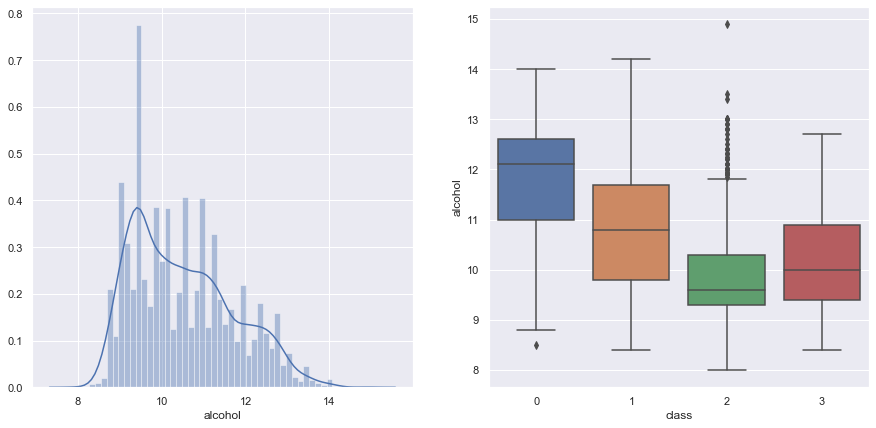

In [102]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df['alcohol'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'alcohol', data=df, ax=axes[1])


In [103]:
# Rework this data ? 

As we can see on the above bar plot, for the excellent quality wines alcohol is much higher than the other. If the range would exceed 15 we could simply say that this can be an effect of fortified wines in the dataset, which has 16-24% and are aged in wood casks exclusively so that may the reason of their quality level.

### Free sulfur dioxide distribution

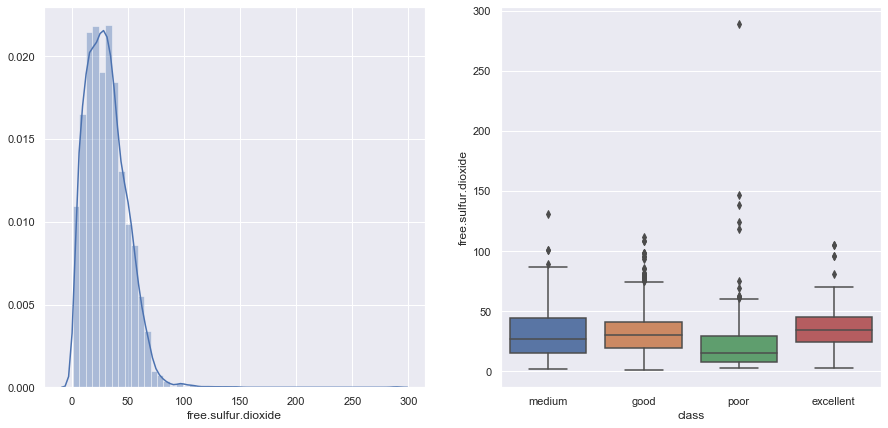

In [104]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df_train['free.sulfur.dioxide'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'free.sulfur.dioxide', data=df_train, ax=axes[1])


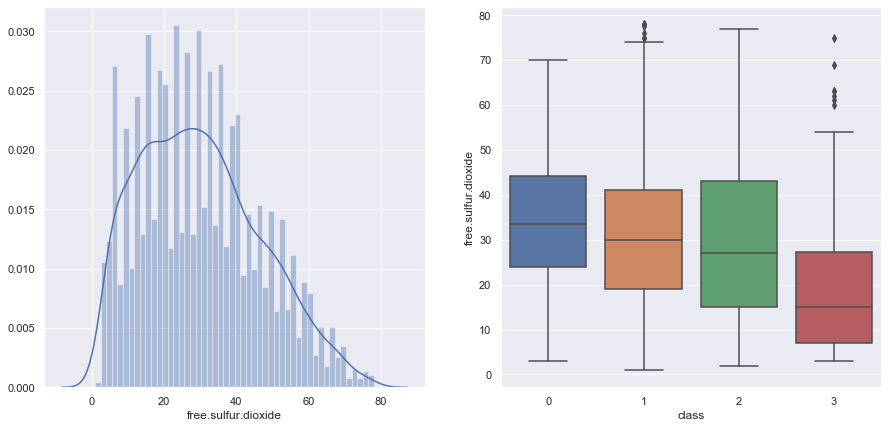

In [105]:
df = inter_quartile_range(df,'free.sulfur.dioxide')

f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df['free.sulfur.dioxide'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'free.sulfur.dioxide', data=df, ax=axes[1])

### Fixed acidity distribution

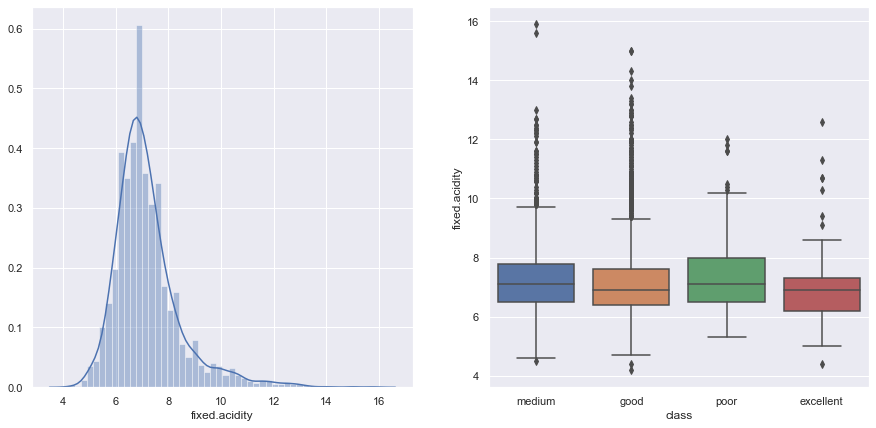

In [106]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df_train['fixed.acidity'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'fixed.acidity', data=df_train, ax=axes[1])


### Density distribution

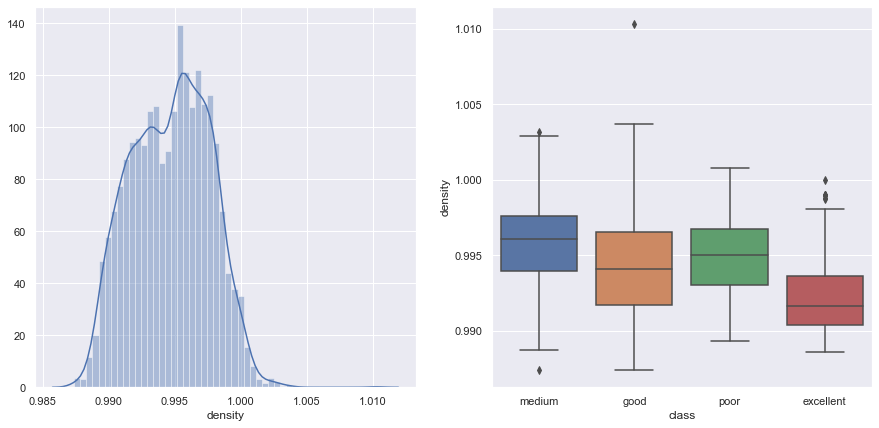

In [107]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df_train['density'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'density', data=df_train, ax=axes[1])


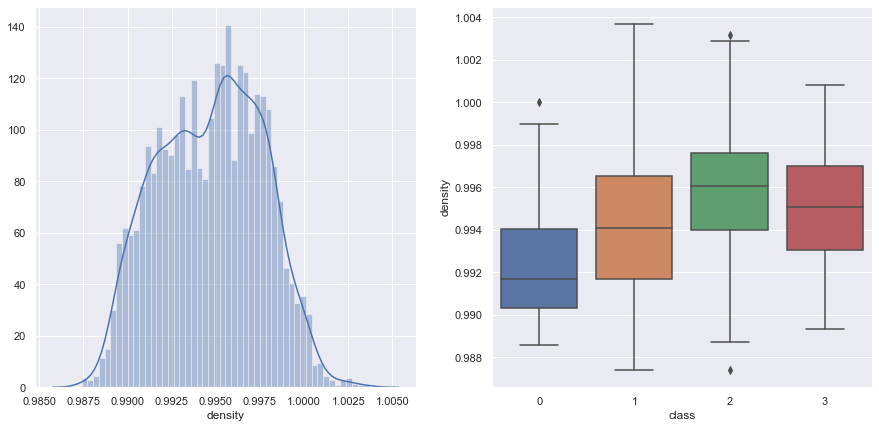

In [108]:
df = inter_quartile_range(df,'density')

f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df['density'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'density', data=df, ax=axes[1])

### Volatile acidity distribution

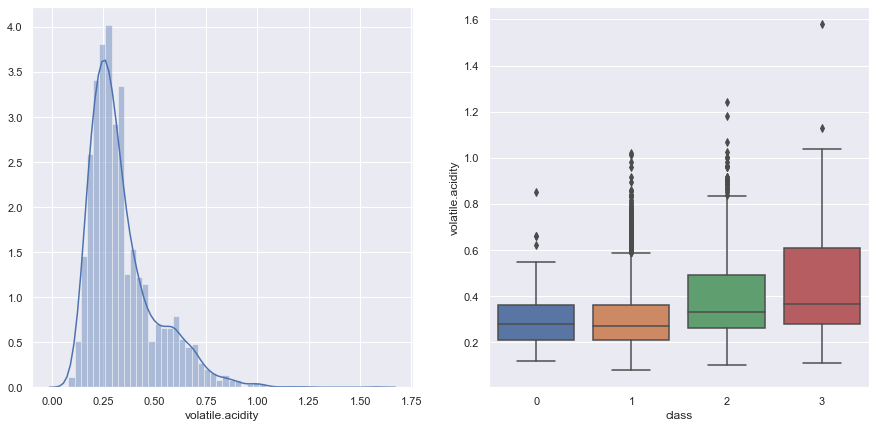

In [109]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df['volatile.acidity'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'volatile.acidity', data=df, ax=axes[1])


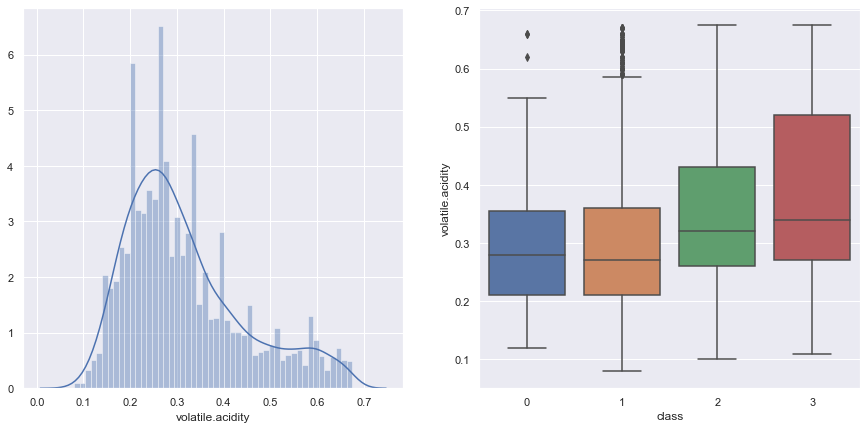

In [110]:
df = inter_quartile_range(df,'volatile.acidity')

f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df['volatile.acidity'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'volatile.acidity', data=df, ax=axes[1])

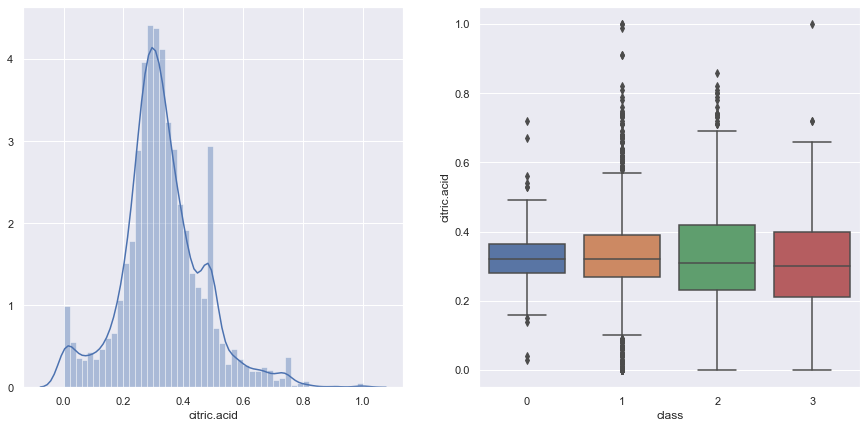

In [111]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df['citric.acid'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'citric.acid', data=df, ax=axes[1])


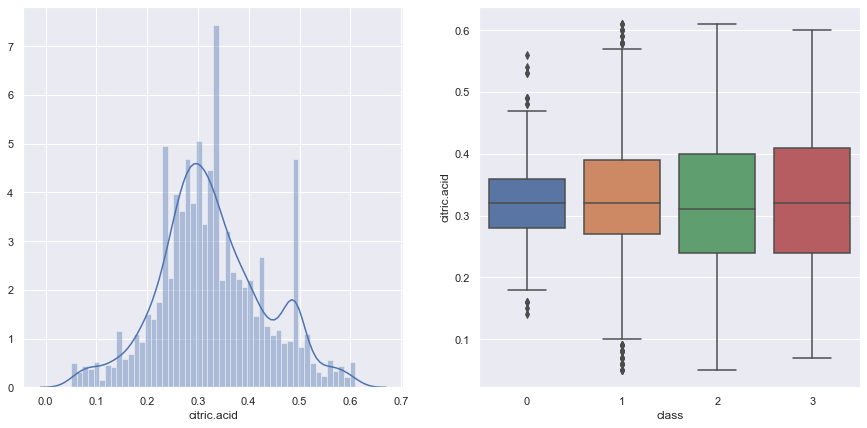

In [112]:
df = inter_quartile_range(df,'citric.acid')

f, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.distplot(df['citric.acid'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'citric.acid', data=df, ax=axes[1])

In [113]:
loi

['alcohol',
 'color',
 'free.sulfur.dioxide',
 'citric.acid',
 'chlorides',
 'density',
 'volatile.acidity',
 'class']

Basically, looking at the visualizations above we can see that we are dealing with the dataset that has been already preprocessed. In a few of them we can see some little outliers, but we will try to train the model not deleting them. 

### Oversampling imbalanced dataset

In [114]:
df = df[loi]
df.head()

,alcohol,color,free.sulfur.dioxide,citric.acid,chlorides,density,volatile.acidity,class
0,9.5,0,21.0,0.44,0.071,0.99920,0.59,2
1,11.3,0,25.0,0.12,0.120,0.99519,0.57,1
2,10.4,1,23.0,0.33,0.052,0.99380,0.23,1
3,11.3,0,15.0,0.32,0.062,0.99470,0.37,1
4,11.5,1,12.0,0.33,0.049,0.99134,0.44,2


In [115]:
df_t = df_test[loi]
df_t.head()

,alcohol,color,free.sulfur.dioxide,citric.acid,chlorides,density,volatile.acidity,class
0,10.3,1,50.0,0.49,0.063,0.99570,0.22,1
1,11.0,1,35.0,0.42,0.050,0.99200,0.27,1
2,11.0,1,23.0,0.30,0.018,0.99380,0.27,1
3,9.7,1,40.0,0.30,0.051,0.99756,0.34,2
4,9.4,0,31.0,0.28,0.082,0.99694,0.34,2


In [116]:
from sklearn.preprocessing import StandardScaler

# Separating data into the x and y datasets
X_train = df.drop(columns=['class'])
y_train = df['class']
X_test = df_t.drop(columns=['class'])
y_test = df_t['class']

# Standaraziation
normalizer = StandardScaler() 
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [117]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

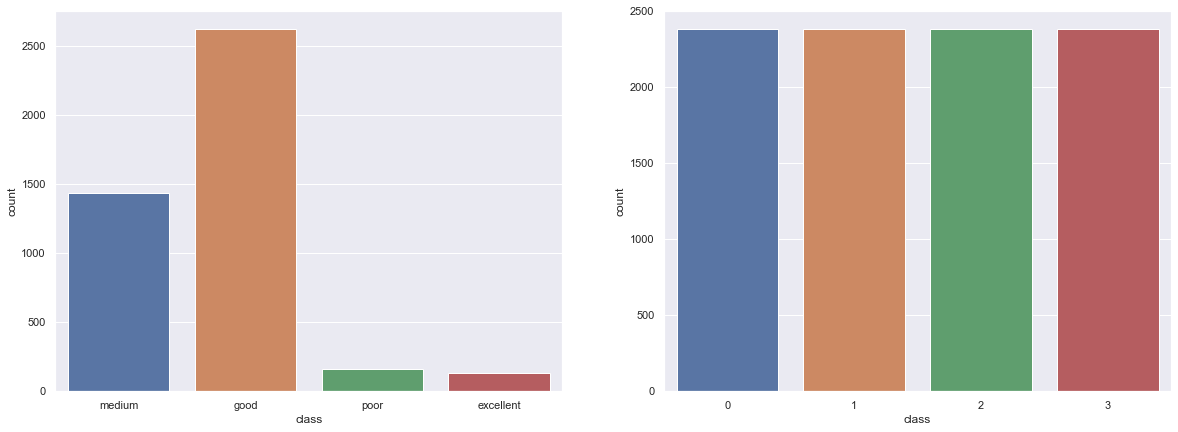

In [118]:
f, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.countplot(x = 'class',data = df_train, ax=axes[0])
sns.countplot(y_train, ax=axes[1])

In [119]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.66
Accuracy of SVM classifier on test set: 0.55


In [120]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.45
Accuracy of GNB classifier on test set: 0.32


In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.51
Accuracy of Logistic regression classifier on test set: 0.42


In [122]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.65


### Neural Network implementation

In [123]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import optimizers

In [124]:
from keras.utils import to_categorical
#one-hot encode target column
train_y_2 = to_categorical(y_train)
test_y_2 = to_categorical(y_test, num_classes = 4)

#vcheck that target column has been converted
print(train_y_2[0:4])
print('---------------')
print(test_y_2[0:6])

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
---------------
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [127]:
adam = optimizers.Adam(learning_rate=0.00005, beta_1=0.9, beta_2=0.999, amsgrad=False)


#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

# create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(60, activation='relu', input_dim = n_cols))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))


model.add(Dense(4, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

#train model , callbacks=[early_stopping_monitor]
history = model.fit(X_train, train_y_2, epochs=100, batch_size=32, validation_data=(X_test, test_y_2))

Train on 9532 samples, validate on 2142 samples
Epoch 1/100
9532/9532 [==============================] - 1s 55us/step - loss: 1.3640 - accuracy: 0.3783 - val_loss: 1.3542 - val_accuracy: 0.2059
Epoch 2/100
9532/9532 [==============================] - 0s 42us/step - loss: 1.2409 - accuracy: 0.4480 - val_loss: 1.2981 - val_accuracy: 0.2148
Epoch 3/100
9532/9532 [==============================] - 0s 38us/step - loss: 1.1135 - accuracy: 0.5084 - val_loss: 1.1946 - val_accuracy: 0.3754
Epoch 4/100
9532/9532 [==============================] - 0s 39us/step - loss: 1.0580 - accuracy: 0.5240 - val_loss: 1.1555 - val_accuracy: 0.4323
Epoch 5/100
9532/9532 [==============================] - 0s 41us/step - loss: 1.0316 - accuracy: 0.5286 - val_loss: 1.1282 - val_accuracy: 0.4599
Epoch 6/100
9532/9532 [==============================] - 0s 40us/step - loss: 1.0137 - accuracy: 0.5325 - val_loss: 1.1484 - val_accuracy: 0.4482
Epoch 7/100
9532/9532 [==============================] - 0s 41us/step - loss

9532/9532 [==============================] - 0s 40us/step - loss: 0.5778 - accuracy: 0.7661 - val_loss: 0.8354 - val_accuracy: 0.6195
Epoch 57/100
9532/9532 [==============================] - 0s 40us/step - loss: 0.5715 - accuracy: 0.7691 - val_loss: 0.8041 - val_accuracy: 0.6429
Epoch 58/100
9532/9532 [==============================] - 0s 39us/step - loss: 0.5648 - accuracy: 0.7747 - val_loss: 0.8247 - val_accuracy: 0.6284
Epoch 59/100
9532/9532 [==============================] - 0s 44us/step - loss: 0.5592 - accuracy: 0.7756 - val_loss: 0.8289 - val_accuracy: 0.6256
Epoch 60/100
9532/9532 [==============================] - 0s 37us/step - loss: 0.5536 - accuracy: 0.7790 - val_loss: 0.7846 - val_accuracy: 0.6555
Epoch 61/100
9532/9532 [==============================] - 0s 38us/step - loss: 0.5478 - accuracy: 0.7809 - val_loss: 0.8280 - val_accuracy: 0.6340
Epoch 62/100
9532/9532 [==============================] - 0s 39us/step - loss: 0.5423 - accuracy: 0.7855 - val_loss: 0.8364 - val_a

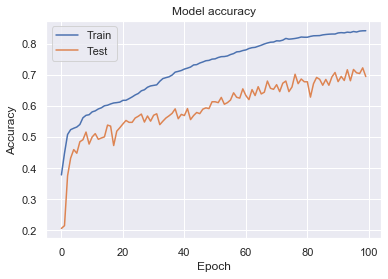

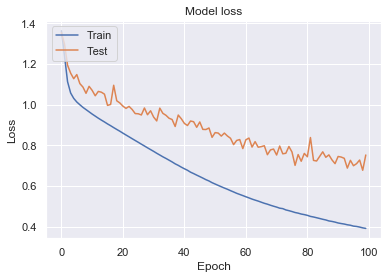

In [128]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#### For 2 classes "good" and "medium"
Below we can see model accuracy and loss from the model with deleted classes "excellent" and "poor"

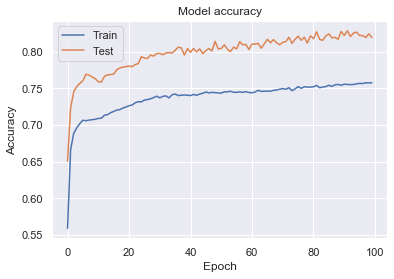

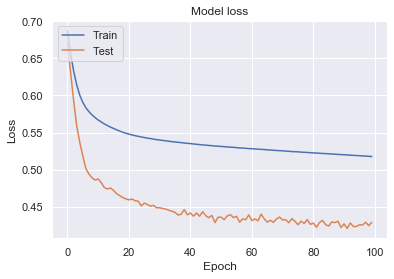

In [85]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Preliminary conclusions
So far I've visualized data with heatmap and calculated correlation to extract the most valuable features from the dataset. 
Choosing a few features from the dataset had given me by the moment the best generalized model i had, which accuracy is something around 72%.

For a feaw features I've managed to implement inter-quartile range to remove the outliers and it improved model accuracy a little bit.

The dataset has got inbalanced training dataset with 2 classes having their value counts really small, and the testing dataset doesn't has these 2 few in data at all. We could improve the result of accuracy on our testing dataset by deleting these 2 classes  but this doesn't make a sense.

